#### Barometrische Höhenformel
##### Exponentiell abfallender Luftdruck als Funktion der Höhe h

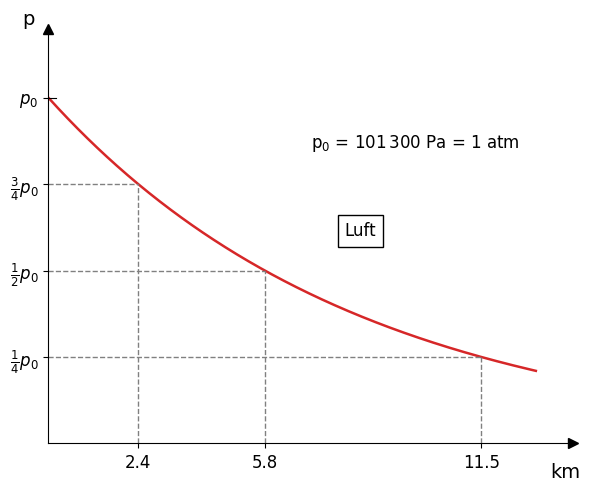

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Einstellungen
x_max = 14  # Maximale x-Achse in km
y_max = 1.2  # Maximale y-Achse (normalisierter Druck)
lw_gray = 1.0  # Linienbreite für graue Hilfslinien
# 1. Daten generieren
# Wir plotten von 0 bis 13 km
h = np.linspace(0, 13, 500)

# Normalisierter Druck (p0 = 1)
# Die Formel basiert auf der Beobachtung im Bild: 
# Bei 5.5 km ist p = 0.5 * p0. Das bedeutet p(h) = p0 * (0.5)^(h/5.5)

g = 9.81  # Erdbeschleunigung in m/s^2
rho0 = 1.24  # Dichte der Luft auf Meereshöhe in kg/m^3
p0 = 101300  # Luftdruck auf Meereshöhe in Pa
H = p0/(rho0*g) / 1000  # Skalenhöhe in km

# Normalisierter Druck
p_norm = 1.0 * np.exp(-h / H)

h_0p75 = H * np.log(4/3)  # Höhe für p = 0.75 * p0
h_0p5 = H * np.log(2)  # Höhe für p = 0.5 * p0
h_0p25 = H * np.log(4)  # Höhe für p = 0.25 * p0
p_norm_0p75 = 0.75
p_norm_0p5 = 0.5
p_norm_0p25 = 0.25

# 2. Plot einrichten
fig, ax = plt.subplots(figsize=(6, 5))

# Rote Kurve plotten
ax.plot(h, p_norm, color='#d62728', linewidth=1.8)

# 3. Hilfslinien (gestrichelt)
# Set für 5.77 km (1/2 p0)
ax.hlines(y=p_norm_0p5, xmin=0, xmax=h_0p5, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p5, ymin=0, ymax=p_norm_0p5, colors='gray', linestyles='--', linewidth=lw_gray)
# Set für 11.54 km (1/4 p0)
ax.hlines(y=p_norm_0p25, xmin=0, xmax=h_0p25, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p25, ymin=0, ymax=p_norm_0p25, colors='gray', linestyles='--', linewidth=lw_gray)
# Set für 3.15 km (3/4 p0)
ax.hlines(y=p_norm_0p75, xmin=0, xmax=h_0p75, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p75, ymin=0, ymax=p_norm_0p75, colors='gray', linestyles='--', linewidth=lw_gray)

# 4. Achsen formatieren (Spines anpassen für Pfeil-Optik)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Achsen-Limits setzen
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# Pfeilspitzen an die Achsenenden fügen
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=7)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=7)

# 5. Beschriftungen (Ticks und Labels)

# X-Achse
ax.set_xticks([h_0p75, h_0p5, h_0p25])
ax.set_xticklabels([str(round(h_0p75, 1)), str(round(h_0p5, 1)), str(round(h_0p25, 1))], fontsize=12)
ax.text(14.2, -0.1, 'km', fontsize=14, ha='right') # Einheit km

# Y-Achse
ax.set_yticks([1.0, 0.75, 0.5, 0.25])
ax.set_yticklabels(['$p_0$', r'$\frac{3}{4} p_0$', r'$\frac{1}{2} p_0$', r'$\frac{1}{4} p_0$'], fontsize=12)
ax.text(-0.7, 1.2, 'p', fontsize=14, va='bottom') # Label p

# Kleiner Strich oben bei p0 (da die Achse weitergeht, aber der Wert dort ist)
ax.plot([0, 0.2], [1, 1], color='black', linewidth=0.8) 

# 6. Text-Annotationen

# Text: p0 = 1013 hPa...
text_str = r"p$_0$ = $101\,300$ Pa = 1 atm"
ax.text(7, 0.9, text_str, fontsize=12, va='top')

# Box mit "Luft"
ax.text(7.9, 0.6, "Luft", fontsize=12, 
        bbox=dict(facecolor='white', edgecolor='black', pad=5))

# Titel oder Layout-Anpassung
plt.tight_layout()

# Anzeigen
# plt.show()

# bbox_inches='tight' schneidet überschüssigen weißen Rand weg
output_folder = 'C:/Users/alexsc31/Documents_privat/FH Campus/Clinical_Engineering/GithubRepo/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Waermelehre/'
plt.savefig(output_folder + 'hoehenformel.pdf', bbox_inches='tight')